# Initial Settings

#### Required Importings

In [1]:
import os 
import glob
import sox
import librosa
import time
import io, json
import numpy as np
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

/Users/arp504/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Initializing Global Variables

In [2]:
# All folds numbers
Folds = range(1,11) # Defining folds numbers From 1 to 10
# Path To Data as required
PathToData = '/Users/arp504/Documents/Spring2016/ML/Homework/LS_Homework2/UrbanSound8K/'
# These set names will help to label each set portion
SetNames = ['Training','Validation','Test']
# During Task 2 I will convert and save each fold in its corresponding folder according to my split

# Task 1
-----
The UrbanSound8K dataset has been downloaded, and stored in the followin path: ```UrbanSound8K/```.

**Q1.1**: There are 10 sound classes in the dataset, which are:<br>
* air conditioner<br>
* car horn<br>
* children playing<br>
* dog bark<br>
* drilling<br>
* engine idling<br>
* gun shot<br>
* jackhammer<br>
* siren<br>
* street music<br>

**Q1.2**:  A priori, I think the **siren** and **carn horn** classes will be harder for the model to distinguish because *they may have the same timbre, because these sounds are designed for coming from inside a car, with simmilar horn design and while recording them, the doppler effect will also affect both*. I also think that the **engine_idling** and **air_conditioner** classes will also be harder for the model to distinguish because *they are both engines running constantly*. I think also that the **drilling** and **jack_hammer** classes will also be harder for the model to distinguish because *they are both hitting sounds*.

**Q1.3**: Is answered in the following cell:

In [3]:
# My personal Split:
# Determining Test, Validation and Trainning Set
MyName = 'AlejandroPorcel'             # Defining My Name
TestFold = len(MyName) % 10 + 1        # Obtaining Test Fold Number
ValidationFold = TestFold % 10 + 1     # Obtaining Validation Fold Number
TrainingFolds = range(1,11)            # Assigning all Folds to Training Folds at first
del TrainingFolds[TestFold - 1]        # Deleting the test fold
del TrainingFolds[ValidationFold - 2]  # Deleting the validation fold
# I tried and it won't work with TestFold = 10, but this is not the case, my name does not give that result.
print "My personal split Based on My Name: {0}, is the following:\n\
The Test Fold is fold{1},\n\
The Validation Fold is fold{2} and\n\
The Training Folds are folds: {3}".format(MyName,TestFold,ValidationFold,TrainingFolds)

My personal split Based on My Name: AlejandroPorcel, is the following:
The Test Fold is fold6,
The Validation Fold is fold7 and
The Training Folds are folds: [1, 2, 3, 4, 5, 8, 9, 10]


# Task 2

Convert all files, making sure that all of them are at the same Sample Rate, Bit Depth, Channels (Mono) and format.

In [4]:
# Defining Path To Data Origin
AudioFolder = PathToData + 'audio/'

# Defining Path To Data of Each Set
TrainFolder = AudioFolder + 'train/'
ValidateFolder = AudioFolder + 'validate/'
TestFolder = AudioFolder + 'test/'

#Making an arrange of Folders
SetFolders = [TrainFolder,ValidateFolder,TestFolder]

# Here we specify the desired output format (As Requested in Assignment)
OutFormat = 'wav'
OutSR = 44100
OutBitDepth = 16
OutChannels = 1

In [5]:
# This is the process with a for
# Total Seconds Counter
TotalWorkTime = 0
# Now get in each fold accordingly to its purpose (Train, Validate and Test)
for fold in Folds:
    # Record starting time.
    StartTime = time.time()
    # According to each fold, the input folder will change
    InputFolder = AudioFolder + 'fold{0}/'.format(fold)
    # To Use in the Set Lists (described above) and according to which fold is, Set Index to:
    if fold in TrainingFolds:
        SetIndex = 0
    elif fold == ValidationFold:
        SetIndex = 1
    elif fold == TestFold:
        SetIndex = 2
    # With Set Index defined, now we take Output Folder and NAme
    OutputFolder = SetFolders[SetIndex]
    SetName = SetNames[SetIndex]
    # Find all files in the input folder (they must all be audio files!)
    AudioFiles = glob.glob(os.path.join(InputFolder, "*.wav"))
    # Get the number of files to process
    Cant = len(AudioFiles)
    print 'Converting {0} files in fold{1}, to {2}'.format(Cant,fold,SetName)
    # Convert each file
    for af in AudioFiles:
        # If it is a ValidFile
        if os.path.isfile(af):
            # Taking out the previous extension 
            OutFile = os.path.join(OutputFolder, "{:s}.{:s}".format(os.path.splitext(os.path.basename(af))[0], OutFormat))
            tfm = sox.Transformer(af, OutFile)
            tfm.convert(samplerate=OutSR, channels=OutChannels, bitdepth=OutBitDepth)
            tfm.build()
    # Record ending time
    EndTime = time.time()
    # Get the working time of all current fold
    WorkTime =  EndTime - StartTime
    # And Adding it to Total Work Time
    TotalWorkTime = TotalWorkTime + WorkTime
    print "Fold {0} with {1} elements took {2} seconds to convert".format(fold,Cant,WorkTime)
print "All Folds took {0} seconds to convert".format(TotalWorkTime)

Converting 873 files in fold1, to Training
Fold 1 with 873 elements took 38.2767031193 seconds to convert
Converting 888 files in fold2, to Training
Fold 2 with 888 elements took 34.8911869526 seconds to convert
Converting 925 files in fold3, to Training
Fold 3 with 925 elements took 34.4422168732 seconds to convert
Converting 990 files in fold4, to Training
Fold 4 with 990 elements took 43.6463849545 seconds to convert
Converting 936 files in fold5, to Training
Fold 5 with 936 elements took 37.2828490734 seconds to convert
Converting 823 files in fold6, to Test
Fold 6 with 823 elements took 26.6895828247 seconds to convert
Converting 838 files in fold7, to Validation
Fold 7 with 838 elements took 32.0343258381 seconds to convert
Converting 806 files in fold8, to Training
Fold 8 with 806 elements took 31.4024810791 seconds to convert
Converting 816 files in fold9, to Training
Fold 9 with 816 elements took 33.7768089771 seconds to convert
Converting 837 files in fold10, to Training
Fold

# Task 3

In [6]:
# According to Assignment define the parameters
SampleRate = 44100
WindowSize = 1024
NBands = 128
Nmfcc = 25
HopSize = 512
# Set to 0 the Total Work Time
TotalWorkTime = 0
# Initializing Dictionary that will contain results
mfccResults = {}

# This statement obtains the raw mfcc and store it into a dictionary
for set_ in range(0,3):
    # Record the start time
    StartTime = time.time()
    # According to Set, set the folder 
    SetFolder = SetFolders[set_]
    # Find all files in the input folder (they must all be audio files!)
    AudioFiles = glob.glob(os.path.join(SetFolder, "*.wav"))
    OutputListmfcc = []
    Cant = len(AudioFiles)
    print 'Applying MFCC to {0} files in {1} Set'.format(Cant,SetNames[set_])
    for af in AudioFiles:
        Outputmfcc = {}
        audio, sr = librosa.load(af, sr=SampleRate, mono=True)
        if sr != SampleRate:
            print "There is a Terrible Error in file {0} because the sample rate is {1} and should be {2}".format(os.path.basename(af),sr,SampleRate)
            os.exit(0)
        mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=WindowSize, hop_length=HopSize,
                                    fmax=SampleRate/2, n_mels=NBands, n_mfcc=(Nmfcc + 1))
        mfcc = mfcc[1:,:] # Discard first element as requested
        Outputmfcc['mfcc'] = mfcc
        Outputmfcc['file'] = os.path.basename(af)
        OutputListmfcc.append(Outputmfcc)
    mfccResults[SetNames[set_]] = OutputListmfcc
    #mark the end time
    EndTime = time.time()
    #calculate the total time it took to complete the work
    WorkTime =  EndTime - StartTime
    TotalWorkTime = TotalWorkTime + WorkTime
    print "{0} Set with {1} elements took {2} seconds to complete".format(SetNames[set_],Cant,WorkTime)
print "All Sets took {0} seconds to complete".format(TotalWorkTime)

Applying MFCC to 7071 files in Training Set
Training Set with 7071 elements took 223.789210081 seconds to complete
Applying MFCC to 838 files in Validation Set
Validation Set with 838 elements took 27.2344770432 seconds to complete
Applying MFCC to 823 files in Test Set
Test Set with 823 elements took 26.1884598732 seconds to complete
All Sets took 277.212146997 seconds to complete


# Task 4

#### Step 1

In [7]:
# Define Metadata Path and File
metadata_path = PathToData + 'metadata/'
metadata_file = 'UrbanSound8K.csv'
#open metadata file to get labels
metadata = pd.read_csv(metadata_path + metadata_file)
#Define a GetLabel Function that queries the given filename 
def GetLabel(filename):
    md_filt = metadata[metadata['slice_file_name'] == filename]    
    return md_filt.get_value(md_filt.index[0],'classID')
#Specify the classes from metadata
labels = list(metadata[['classID','class']].drop_duplicates().sort(['classID']).reset_index(drop=True)['class'])

/Users/arp504/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [8]:
# Define each set lists of features and labels
TrainLabels = []
TrainFeatures = []
ValidateLabels = []
ValidateFeatures = []
TestLabels = []
TestFeatures = []

# Now, make the process for every Set (Training, Validation and Test)
for set_ in SetNames:
    print "Processing {0} Set".format(set_)
    for record in mfccResults[set_]:
        mfcc = record['mfcc']
        FileName = record['file']
        Label = GetLabel(FileName)
        # Summarize the time-series (per-frame values) for each mfcc coefficient:
        # Hint: we could also compute these statistics on the delta and delta-delta
        # time series. We could also compute more statistics from each time series!
        mfccMeans = np.mean(mfcc, 1)
        mfccStdDevs = np.std(mfcc, 1)
        
        # For possible future we add this code commented
        # We could do the same for the delta features like this:
        # mfccDMeans = np.mean(np.diff(mfcc), 1)
        # mfccDStdDevs = np.std(np.diff(mfcc), 1)
    
         # Concatenate means and std. dev's into a single feature vector
        FeatureVector = np.concatenate((mfccMeans, mfccStdDevs), axis=0)
        #print("File {0} with a feature vector shape: {1}, with label {2}".format(filename,feature_vector.shape,label))
        
        # Depending on Set, it will increase labels and feature vector
        if set_ == 'Training':
            TrainLabels.append(Label)
            TrainFeatures.append(FeatureVector)
        elif set_ == 'Validation':
            ValidateLabels.append(Label)
            ValidateFeatures.append(FeatureVector)
        elif set_ == 'Test':
            TestLabels.append(Label)
            TestFeatures.append(FeatureVector)

        

Processing Training Set
Processing Validation Set
Processing Test Set


#### Step 2

In [9]:
#Now Standarize
# Create a scale object
scaler = sklearn.preprocessing.StandardScaler()

# Learn the parameters from the training data only
scaler.fit(TrainFeatures)

# Apply the learned parameters to the training, validation and test sets:
TrainFeaturesScaled = scaler.transform(TrainFeatures)
ValidateFeaturesScaled = scaler.transform(ValidateFeatures)
TestFeaturesScaled = scaler.transform(TestFeatures)

# Task 5

#### Define Previous Functions for using in next steps

In [10]:
# For this Task, and for Nearest Neighbors, define a Function that could do everything about calculation requested
# First of all, define the Plot of Confusion Matrix with a Title, at least a title together to the main one
def PlotCM(cm,Section):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.imshow(cm, interpolation='nearest', cmap='gray')
    for i, line in enumerate(cm):
        for j, l in enumerate(line):
            ax.text(j, i, l, size=16, color='green',ha='center',va='center')
    ax.set_xticks(range(len(cm)))
    ax.set_xticklabels(labels,rotation='vertical',fontsize=14)
    ax.set_yticks(range(len(cm)))
    ax.set_yticklabels(labels,fontsize=14)
    ax.set_ylabel('True label',fontsize=18)
    ax.set_xlabel('Predicted label',fontsize=18)
    ax.set_title('Confusion Matrix - {0}'.format(Section),fontsize=22)
    plt.show()
# Next, and before Defining a Function for Calculating Nearest Neighbors,
# I defined A General Calculation of Prediction, with Accuracy Calculation and Confusion Matrix Plot
# This Function Trains on Train Set and Test on Validation Set
def CalcPred(clf,Title,TrainFeatures,TrainLabels,TestFeatures,TestLabels,reqPlot=True):
    # Fit (=train) the model
    clf.fit(TrainFeatures, TrainLabels)

    # Now lets predict the labels of the Test data! (When Calling Could Change to Validate Features)
    Predictions = clf.predict(TestFeatures)

    # We can use sklearn to compute the accuracy score
    Accuracy = sklearn.metrics.accuracy_score(TestLabels, Predictions)
    # No need to check this information if there is no plot Required
    if reqPlot:
        print "Accuracy : {0}".format(Accuracy)

    # Confusion Matrix (A very rare one 10 x 10)
    cm = sklearn.metrics.confusion_matrix(TestLabels, Predictions)
    # Plot With Function Defined Before if Required, by default is True
    if reqPlot:
        PlotCM(cm,Title)
    # In order to check how Accuracy evolves with K, the Nearest Neighbors
    return Accuracy,Predictions

# Because Nearest Neighbors is used mainly in this task, I prepared a Special Calculation for this
def CalcKNN(K,TrainFeatures,TrainLabels,TestFeatures,TestLabels,reqPlot=True):
    # Use a K nearest neighbour classifier with K defined in parameters
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=K)
    
    #Now Calculate the Prediction, Accuracy and Display the Confussion Matrix
    Accuracy, Predictions = CalcPred(clf,'K = {0} Nearest Neighbors'.format(K),TrainFeatures,TrainLabels,TestFeatures,TestLabels,reqPlot)
    
    return Accuracy

#### Step 1

Accuracy : 0.509546539379


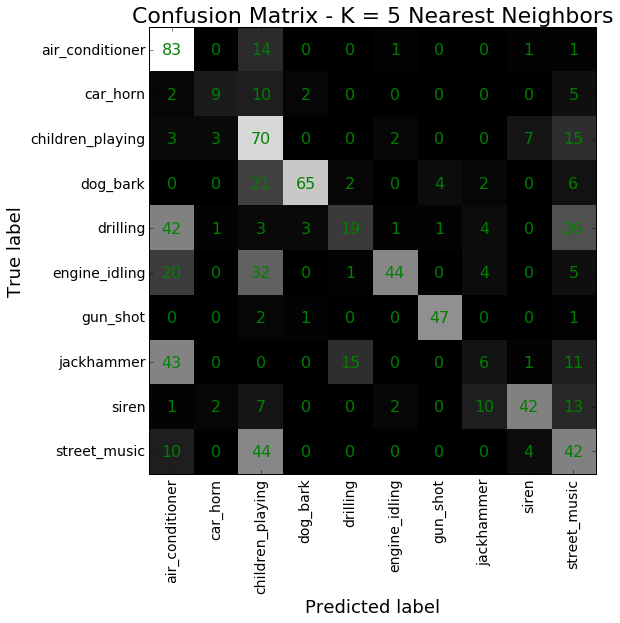

In [11]:
# As Requested, First Using K = 5 Nearest Neighbors
Accuracy = CalcKNN(5,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

**Q5.1**: The Classification Accuracy is about 50.95%, this could be due a lot of confussion classes, described below

**Q5.2**: According to the plotted Confusion Matrix above, the most confused classes are: **street_music** as **children_playing**, **jackhammer** as **air_conditioner** and **drilling** also as **air_conditioner**.

#### Step 2

In [12]:
# Take values of K and Accuracy for K = 5
# First define list
K_list = []
Acc_list = []

Accuracy : 0.517899761337


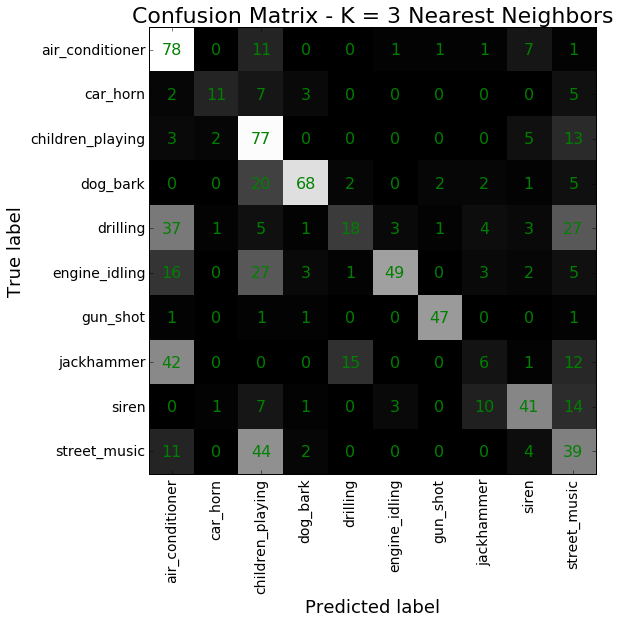

In [13]:
# Now calculate for K = 3
Accuracy = CalcKNN(3,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

#Now Record Accuracy for K = 3
K_list.append(3)
Acc_list.append(Accuracy)

#For Keeping K list in order, After K = 3 record Accuracy for K = 5
Accuracy = CalcKNN(5,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels,reqPlot = False)
K_list.append(5)
Acc_list.append(Accuracy)

Accuracy : 0.514319809069


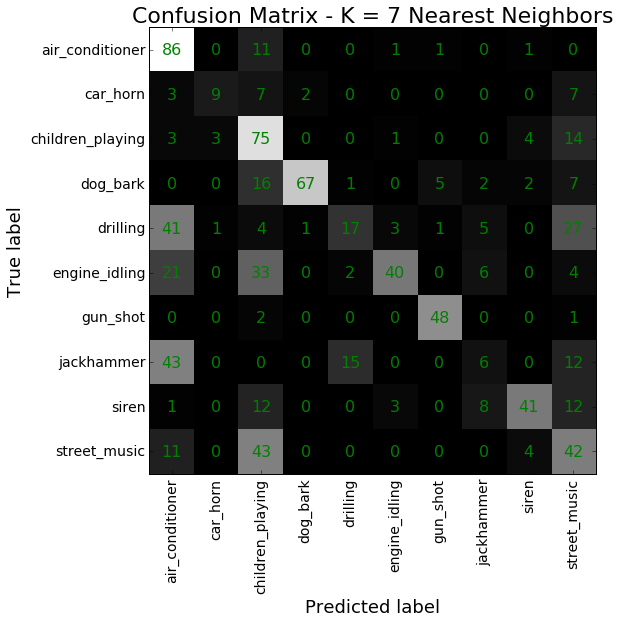

In [14]:
# Same calculations for K = 7
Accuracy = CalcKNN(7,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

#Now Record Accuracy for K = 7
K_list.append(7)
Acc_list.append(Accuracy)

Accuracy : 0.509546539379


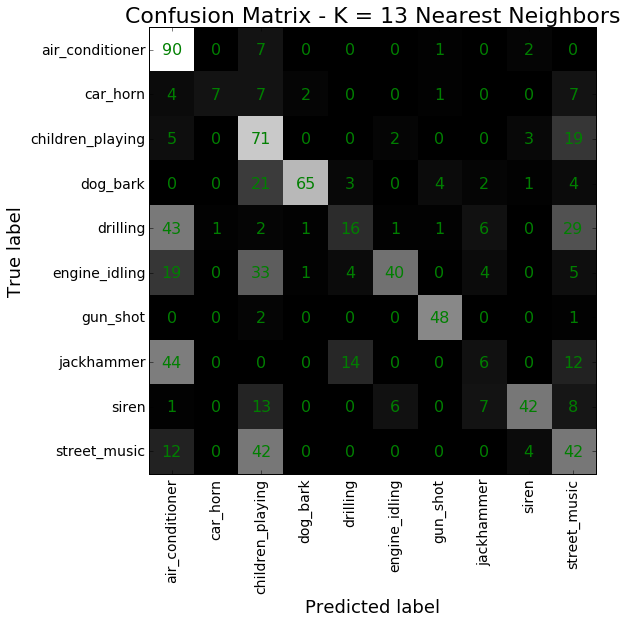

In [15]:
# Same calculations for K = 13
Accuracy = CalcKNN(13,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

#Now Record Accuracy for K = 13
K_list.append(13)
Acc_list.append(Accuracy)

**Q5.3**: (1/3) The Accuracy is slighly better for K = 3, 7, but with K = 13 it is the same as K = 5, the difference between them is that the confused classes are slightly different. So there is neither direct nor indirect change of Accuracy with a change of K. This could be because the timbres calculated by mfcc may overlap other timbers characteristics and Nearest Neighbors may not always take the most accurate set of characteristics, this could be confirmed if the final accuracy trend is to decrease when the K increases. It also could be because Nearest Neighbors consider which other K features are closer even if the last K considered could be very far away. In the following Graph it can be seen that there is no proportion between the values of K and accuracy.

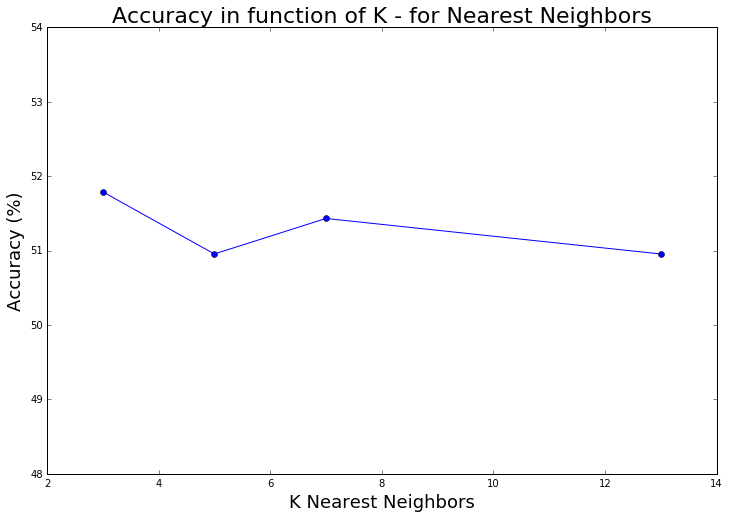

In [16]:
# Here we see how it changes in function of K 
plt.figure(figsize=(12,8))
plt.plot(K_list,[i * 100 for i in Acc_list],'-b',marker='o')
plt.xlabel('K Nearest Neighbors',fontsize=18)
plt.ylabel('Accuracy (%)',fontsize = 18)
plt.ylim(48,54)
plt.xlim(2,14)
plt.title('Accuracy in function of K - for Nearest Neighbors',fontsize=22);

**Q5.3**: (2/3) In order to get more information, now I create a Expanded Calculation to find the final trend of accuracy

In [17]:
# Between 13 and 3 there are a lot of numbers that could be gotten in order to make a smoother graphic
K_list2 = []
Acc_list2 = []
maxK = 20
for i in range(1,maxK + 1):
    #Record Accuracy for K = i
    Accuracy = CalcKNN(i,TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels,reqPlot = False)
    K_list2.append(i)
    Acc_list2.append(Accuracy)

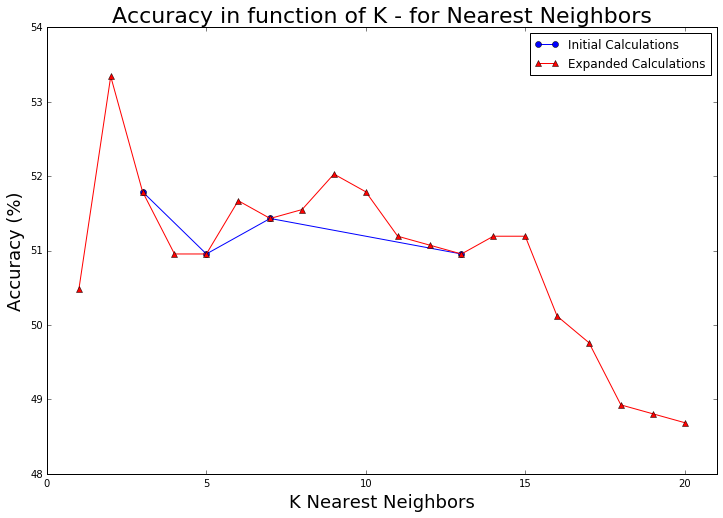

In [18]:
plt.figure(figsize=(12,8))
plt.plot(K_list,[i * 100 for i in Acc_list],'-b',marker='o',label='Initial Calculations')
plt.plot(K_list2,[i * 100 for i in Acc_list2],'-r',marker='^',label='Expanded Calculations')
plt.xlabel('K Nearest Neighbors',fontsize=18)
plt.ylabel('Accuracy (%)',fontsize = 18)
plt.ylim(48,54)
plt.xlim(0,maxK + 1)
plt.title('Accuracy in function of K - for Nearest Neighbors',fontsize=22)
plt.legend();

**Q5.3**: (3/3) This Graph confirms that the most K Nearest Neighbors used, it confuses more. The Peak of Accuracy is in K = 2, and it oscilates between K = 4 and K = 15, and then shows its real trend. A very large K is not usually well considered for analysis, but this graph shows the trend.

#### Step 3

Accuracy : 0.652744630072


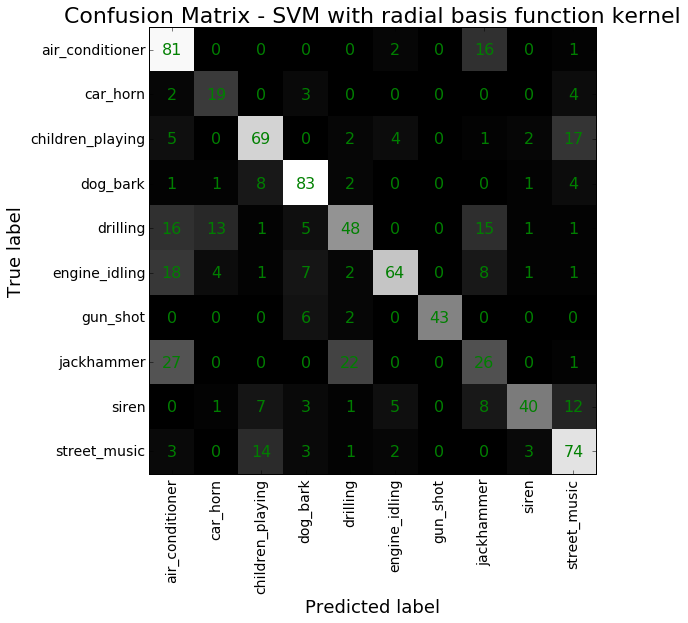

In [19]:
# Using SVM
clf = svm.SVC(kernel='rbf') 
Accuracy,Predictions = CalcPred(clf,'SVM with radial basis function kernel',TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

Accuracy : 0.596658711217


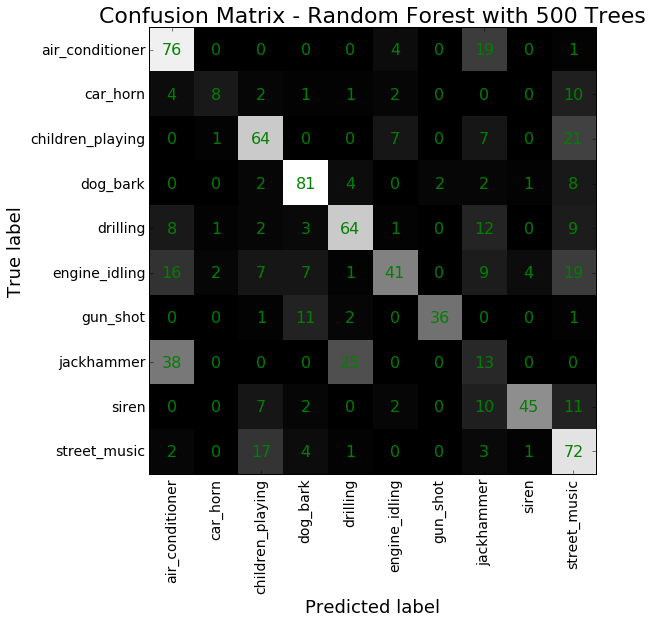

In [20]:
# Using Random Forest
num_trees = 500
rf = RandomForestClassifier(n_estimators=num_trees)
Accuracy,Predictions = CalcPred(rf,'Random Forest with 500 Trees',TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

**Q5.4**: SVM has a notorious increase in Accuracy to 68.27%, in the confusion Matrix it also shows a real decrease in the most confused classes in the analyzed K Neighbors. Random Forest has also a increase in Accuracy (58.83%), but only the half of the increase in SVM. Random Forest also has a very notorious decrease in confusion classes, but lower.

# Task 6

In [21]:
# Define each set lists of features and labels
TrainLabels = []
TrainFeatures = []
ValidateLabels = []
ValidateFeatures = []
TestLabels = []
TestFeatures = []

for set_ in SetNames:
    print "Processing {0} Set".format(set_)
    for record in mfccResults[set_]:
        mfcc = record['mfcc']
        FileName = record['file']
        Label = GetLabel(FileName)
        # Summarize the time-series (per-frame values) for each mfcc coefficient:
        # Hint: we could also compute these statistics on the delta and delta-delta
        # time series. We could also compute more statistics from each time series!
        mfccMeans = np.mean(mfcc, 1)
        mfccStdDevs = np.std(mfcc, 1)
        
        # Now as requested do the same for the delta features like this:
        mfccDMeans = np.mean(np.diff(mfcc), 1)
        mfccDStdDevs = np.std(np.diff(mfcc), 1)
    
         # Concatenate means and std. dev's into a single feature vector
        FeatureVector = np.concatenate((mfccMeans,mfccStdDevs,mfccDMeans,mfccDStdDevs), axis=0)
        #print("File {0} with a feature vector shape: {1}, with label {2}".format(filename,feature_vector.shape,label))
        
        # Depending on Set, it will increase labels and feature vector
        if set_ == 'Training':
            TrainLabels.append(Label)
            TrainFeatures.append(FeatureVector)
        elif set_ == 'Validation':
            ValidateLabels.append(Label)
            ValidateFeatures.append(FeatureVector)
        elif set_ == 'Test':
            TestLabels.append(Label)
            TestFeatures.append(FeatureVector)

Processing Training Set
Processing Validation Set
Processing Test Set


In [22]:
#Now Standarize
# Create a scale object
scaler = sklearn.preprocessing.StandardScaler()

# Learn the parameters from the training data only
scaler.fit(TrainFeatures)

# Apply the learned parameters to the training, validation and test sets:
TrainFeaturesScaled = scaler.transform(TrainFeatures)
ValidateFeaturesScaled = scaler.transform(ValidateFeatures)
TestFeaturesScaled = scaler.transform(TestFeatures)

Accuracy : 0.656324582339


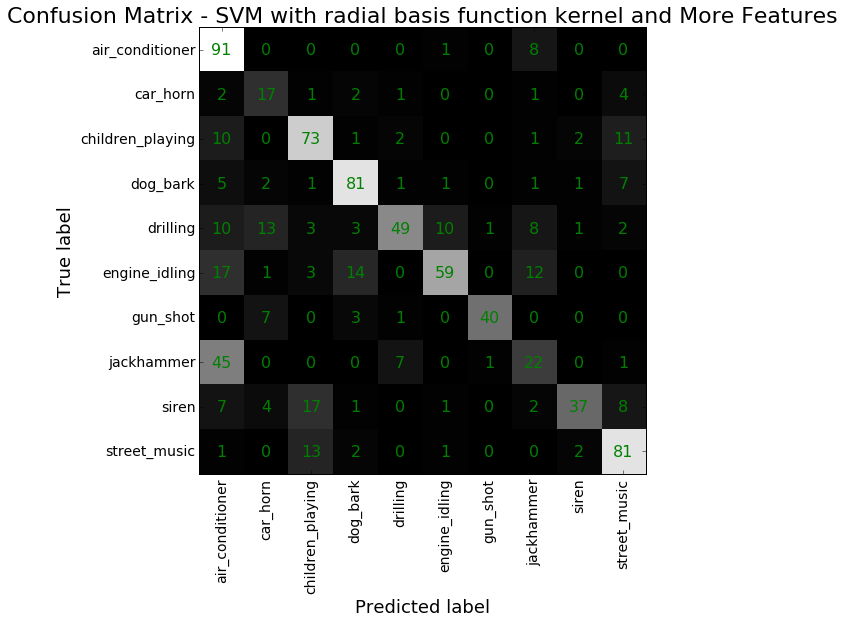

In [23]:
# Using SVM
clf = svm.SVC(kernel='rbf') 
Accuracy,Predictions = CalcPred(clf,'SVM with radial basis function kernel and More Features',TrainFeaturesScaled,TrainLabels,ValidateFeaturesScaled,ValidateLabels)

**Q6.1**: Using SVM, because it had the best Accuracy in Task 5. The increase in Accuracy now is slightly higher (65.63%). So there is also less confussion showed in the confusion matrix. This could be because there is more features in each trained class that could lead to better results.

# Task 7

#### Step 1, quantitative analysis

In [24]:
# Define each set lists of features and labels
TrainLabels = []
TrainFeatures = []
TestLabels = []
TestFeatures = []
TestFiles = []

for set_ in SetNames:
    print "Processing {0} Set".format(set_)
    for record in mfccResults[set_]:
        mfcc = record['mfcc']
        FileName = record['file']
        Label = GetLabel(FileName)
        # Summarize the time-series (per-frame values) for each mfcc coefficient:
        # Hint: we could also compute these statistics on the delta and delta-delta
        # time series. We could also compute more statistics from each time series!
        mfccMeans = np.mean(mfcc, 1)
        mfccStdDevs = np.std(mfcc, 1)
        
        # For possible future we add this code commented
        # We could do the same for the delta features like this:
        mfccDMeans = np.mean(np.diff(mfcc), 1)
        mfccDStdDevs = np.std(np.diff(mfcc), 1)
    
         # Concatenate means and std. dev's into a single feature vector
        FeatureVector = np.concatenate((mfccMeans,mfccStdDevs,mfccDMeans,mfccDStdDevs), axis=0)
        #print("File {0} with a feature vector shape: {1}, with label {2}".format(filename,feature_vector.shape,label))
        
        # Depending on Set, it will increase labels and feature vector
        if set_ == 'Training':
            TrainLabels.append(Label)
            TrainFeatures.append(FeatureVector)
        elif set_ == 'Validation':
            TrainLabels.append(Label)
            TrainFeatures.append(FeatureVector) # All Validation now goes to Train
        elif set_ == 'Test':
            TestLabels.append(Label)
            TestFeatures.append(FeatureVector)
            TestFiles.append(TestFolder + FileName)

Processing Training Set
Processing Validation Set
Processing Test Set


In [25]:
#Now Standarize
# Create a scale object
scaler = sklearn.preprocessing.StandardScaler()

# Learn the parameters from the training data only
scaler.fit(TrainFeatures)

# Apply the learned parameters to the training and test sets:
TrainFeaturesScaled = scaler.transform(TrainFeatures)
TestFeaturesScaled = scaler.transform(TestFeatures)

Accuracy : 0.69744835966


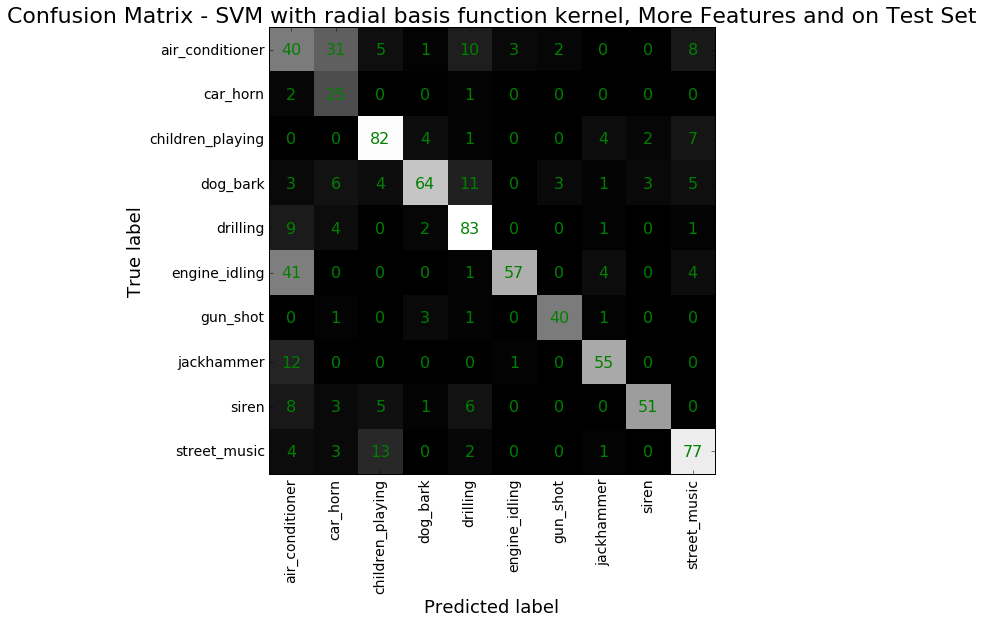

In [26]:
# Using SVM
clf = svm.SVC(kernel='rbf') 
Accuracy, Predictions = CalcPred(clf,'SVM with radial basis function kernel, More Features and on Test Set',TrainFeaturesScaled,TrainLabels,TestFeaturesScaled,TestLabels)

**Q7.1**: The model performed slightly better now in terms of accuracy (69.74%), in the other hand there is a lot of confussion in different parts of the confussion matrix where there were not much confussion in previous tasks (p.e. **air_conditioner** as **car_horn**).

**Q7.2**: The model didn't performed as expected, because of the new confussions described above. This could be because the different set used to test.

#### Step 2, qualitative analysis

In [27]:
# Print results of confused information
index = 0
for filename, prediction, label in zip(TestFiles, Predictions, TestLabels):
    if prediction != label:
        print "{:d} {:s} is {:s} but was classified as {:s}".format(
            index, os.path.basename(filename), labels[label], labels[prediction])
    index += 1

0 101281-3-0-0.wav is dog_bark but was classified as drilling
1 101281-3-0-14.wav is dog_bark but was classified as drilling
2 101281-3-0-5.wav is dog_bark but was classified as drilling
3 104327-2-0-15.wav is children_playing but was classified as jackhammer
5 104327-2-0-26.wav is children_playing but was classified as jackhammer
7 104327-2-0-3.wav is children_playing but was classified as jackhammer
10 104327-2-0-4.wav is children_playing but was classified as jackhammer
14 106486-5-0-0.wav is engine_idling but was classified as jackhammer
15 106486-5-0-1.wav is engine_idling but was classified as jackhammer
16 106486-5-0-2.wav is engine_idling but was classified as jackhammer
27 108638-9-0-0.wav is street_music but was classified as drilling
28 108638-9-0-1.wav is street_music but was classified as children_playing
29 108638-9-0-2.wav is street_music but was classified as children_playing
32 108638-9-0-6.wav is street_music but was classified as drilling
44 111386-5-0-0.wav is engin

Choosing classes that are most confused

In [38]:
# engine_idling as air_conditioner 
audio_err, _ = librosa.load(TestFiles[769], sr=SampleRate)
Audio(audio_err, rate=SampleRate)

In [36]:
# air_conditioner as car_horn
audio_err, _ = librosa.load(TestFiles[412], sr=SampleRate)
Audio(audio_err, rate=SampleRate)

In [37]:
# street_music as children_playing
audio_err, _ = librosa.load(TestFiles[28], sr=SampleRate)
Audio(audio_err, rate=SampleRate)

**Q7.3**:
* An **engine_idling** as **air_conditioner**, this could be because the engine emits a sound that is very similar to the engine of an air_conditioner.
* An **air_conditioner** as **car_horn**, this could be because the vibration in the recording has a timbre very similar to a car horn.
* A **street_music** as **children_playing**, this could be because the background contains music.

Feedback:
* Sugest takeout extension to get a simple wav file with no ".wav.wav"